In [40]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    # "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [41]:
# creating dataframes from results files
df_heuristic = pd.read_csv('./results/results_heuristic.csv', index_col='Unnamed: 0')
df_RL_TF_5 = pd.read_csv('./results/results_RL_TL_5.csv', index_col='Unnamed: 0')
df_RL_TF_10 = pd.read_csv('./results/results_RL_TL_10.csv', index_col='Unnamed: 0')
df_RL_TF_15 = pd.read_csv('./results/results_RL_TL_15.csv', index_col='Unnamed: 0')

In [42]:
# combining all datasets and meaning

df = pd.concat([df_heuristic, df_RL_TF_5, df_RL_TF_10, df_RL_TF_15], axis = 1, keys=('heuristic', 'TF_5', 'TF_10', 'TF_15'))
df_meaned = df.groupby(('heuristic' ,'traffic_load')).mean()

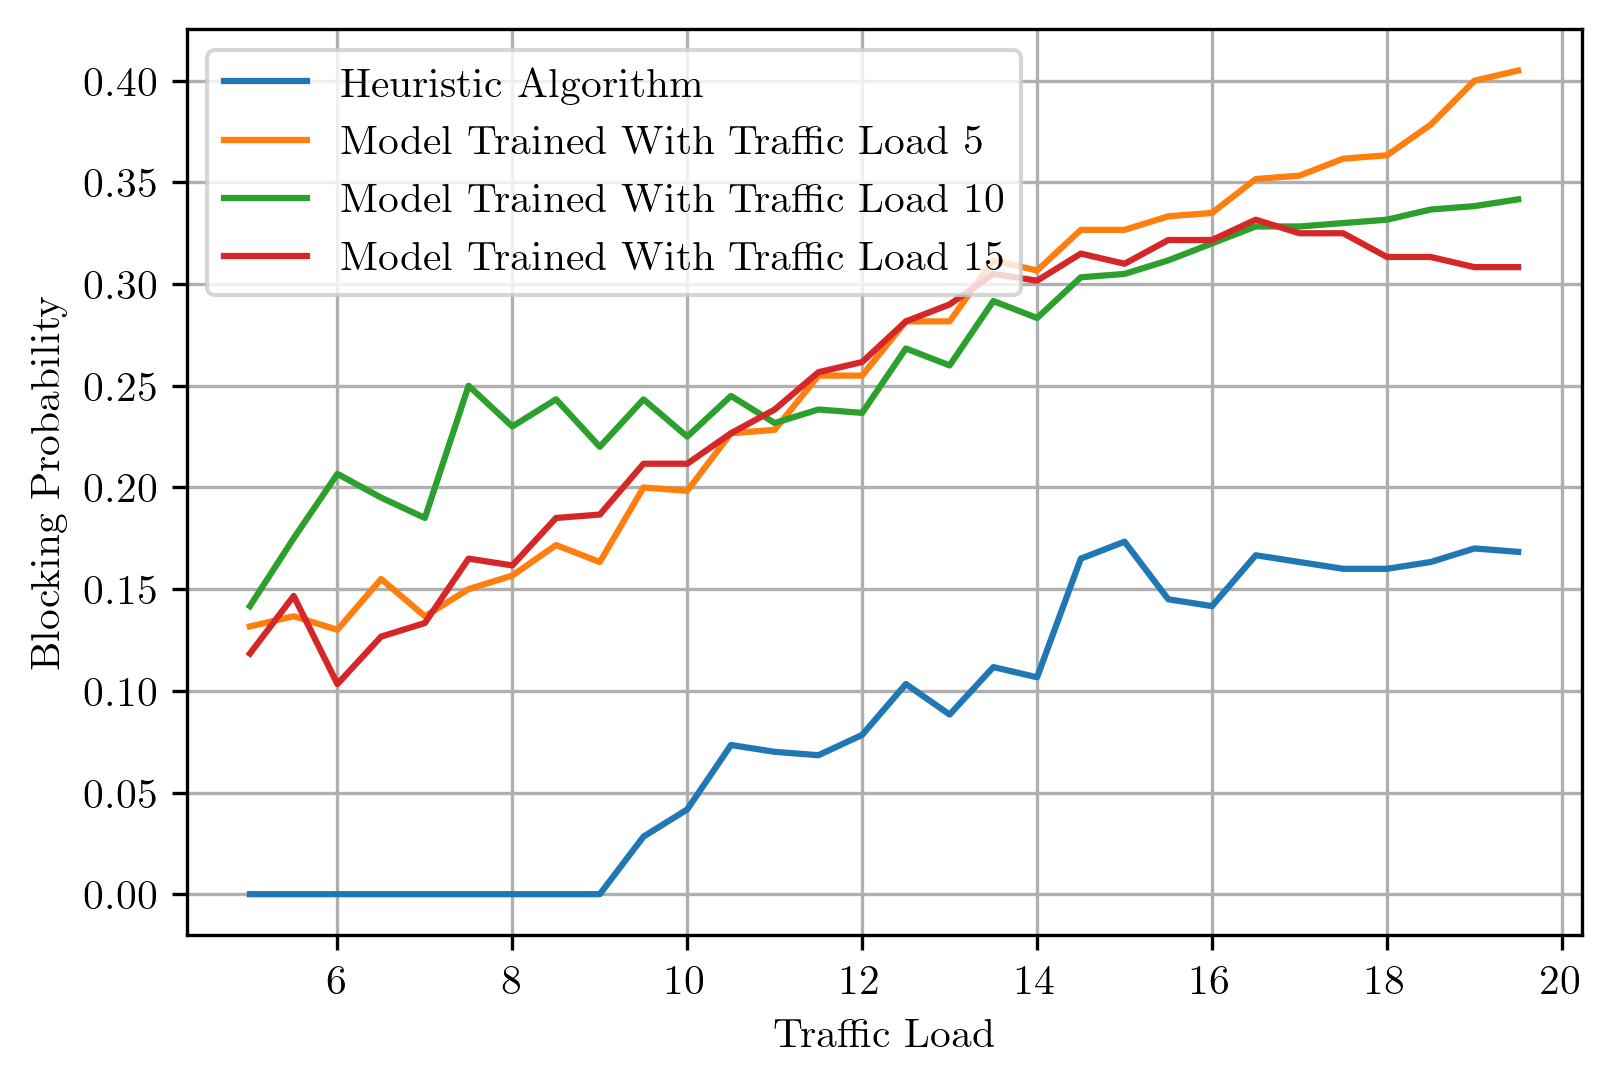

In [43]:
# blocking probability vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('heuristic', 'bp'), ('TF_5', 'bp'), ('TF_10', 'bp'), ('TF_15', 'bp')],
    ax = ax,
    grid=True
)
ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Traffic Load')
plt.show()
# plt.savefig('./figures/bp_vs_traffic_load.pgf', format='pgf')

In [44]:
df_meaned.head(5)

heuristic                                \
                                 bp avg_length blocked_continuous   
(heuristic, traffic_load)                                           
5.0                             0.0       2.86                0.0   
5.5                             0.0       2.86                0.0   
6.0                             0.0       2.85                0.0   
6.5                             0.0       2.85                0.0   
7.0                             0.0       2.85                0.0   

                                                  TF_5             \
                          blocked_contiguous        bp avg_length   
(heuristic, traffic_load)                                           
5.0                                      0.0  0.131667   3.663205   
5.5                                      0.0  0.136667   3.640329   
6.0                                      0.0  0.130000   3.653771   
6.5                                      0.0  0.155000   3.769544   
7.0                                      0.0  0.136667   3.710722   

                                                                              \
                          blocked_continuous blocked_contiguous traffic_load   
(heuristic, traffic_load)                                                      
5.0                                      0.0           0.157172          5.0   
5.5                                      0.0           0.153362          5.5   
6.0                                      0.0           0.173186          6.0   
6.5                                      0.0           0.189238          6.5   
7.0                                      0.0           0.176002          7.0   

                              TF_10                                \
                                 bp avg_length blocked_continuous   
(heuristic, traffic_load)                                           
5.0                        0.141667   3.598894                0.0   
5.5                        0.175000   3.733001                0.0   
6.0                        0.206667   3.738131                0.0   
6.5                        0.195000   3.766944                0.0   
7.0                        0.185000   3.729945                0.0   

                                                              TF_15  \
                          blocked_contiguous traffic_load        bp   
(heuristic, traffic_load)                                             
5.0                                 0.207804          5.0  0.118333   
5.5                                 0.182054          5.5  0.146667   
6.0                                 0.198771          6.0  0.103333   
6.5                                 0.205586          6.5  0.126667   
7.0                                 0.214048          7.0  0.133333   

                                                                            \
                          avg_length blocked_continuous blocked_contiguous   
(heuristic, traffic_load)                                                    
5.0                         3.562762                0.0           0.237419   
5.5                         3.641371                0.0           0.260746   
6.0                         3.645910                0.0           0.213220   
6.5                         3.669704                0.0           0.246279   
7.0                         3.706938                0.0           0.221077   

                                        
                          traffic_load  
(heuristic, traffic_load)               
5.0                                5.0  
5.5                                5.5  
6.0                                6.0  
6.5                                6.5  
7.0                                7.0

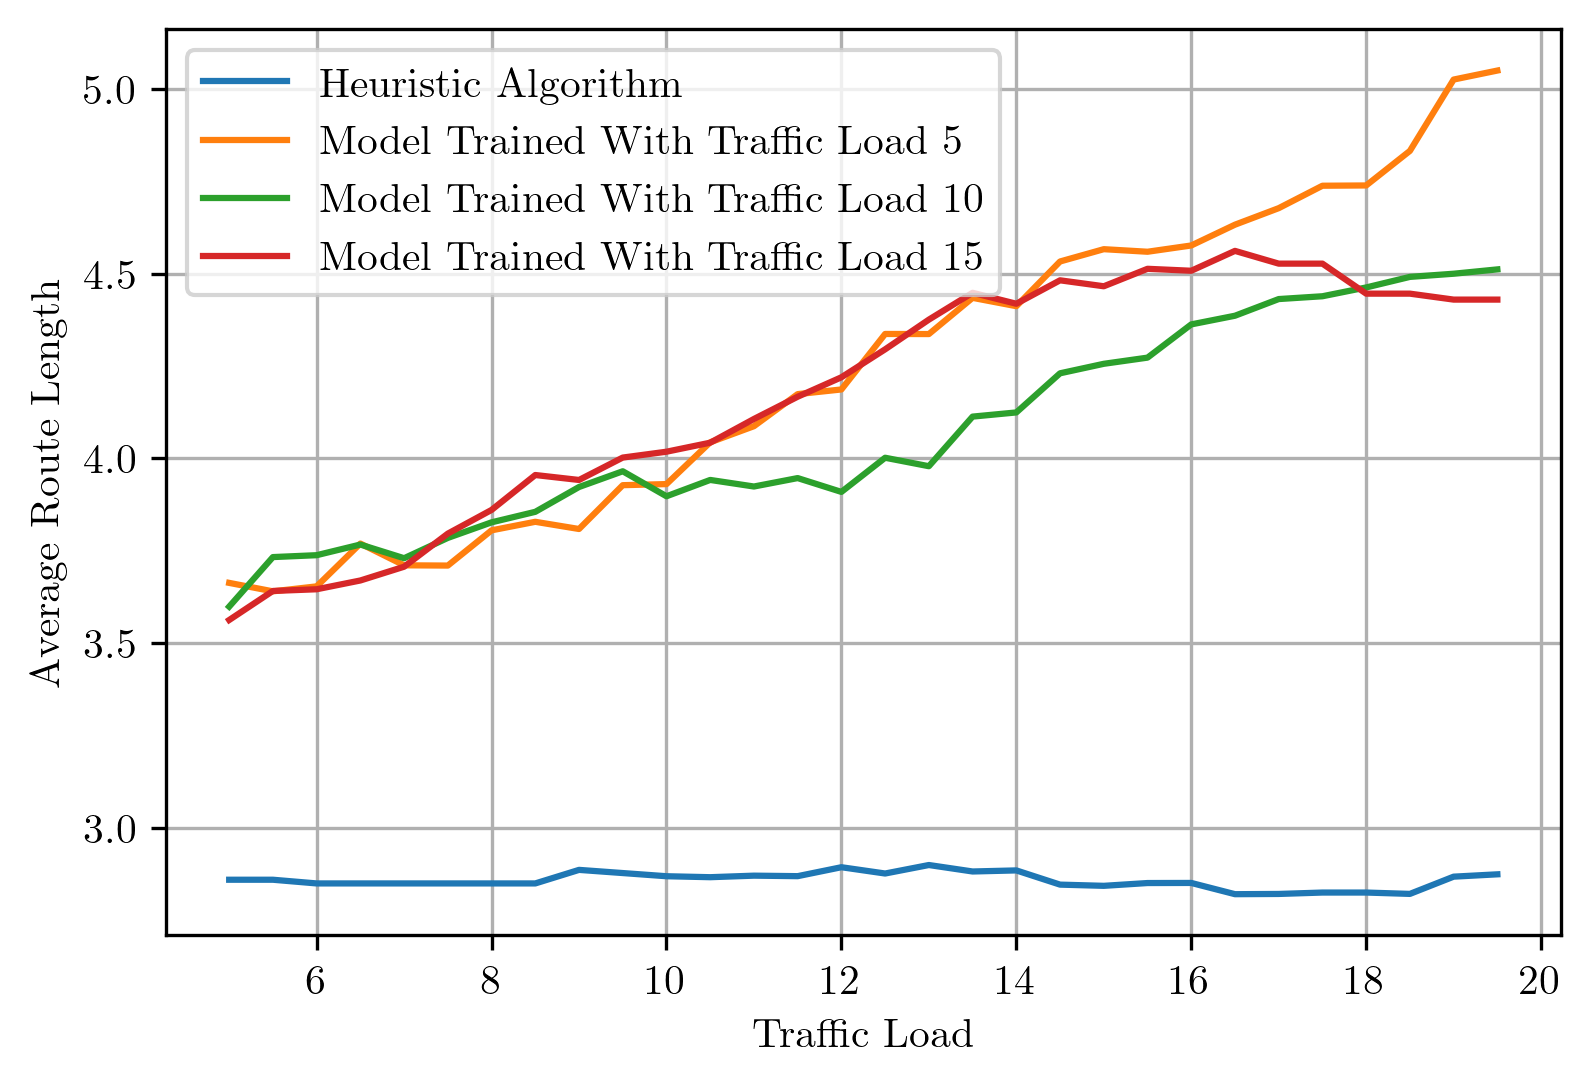

In [45]:
# route length vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('heuristic', 'avg_length'), ('TF_5', 'avg_length'), ('TF_10', 'avg_length'), ('TF_15', 'avg_length')],
    ax = ax,
    grid=True
)
ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Average Route Length')
ax.set_xlabel('Traffic Load')
plt.show()
# plt.savefig('./figures/length_vs_traffic_load.pgf', format='pgf')

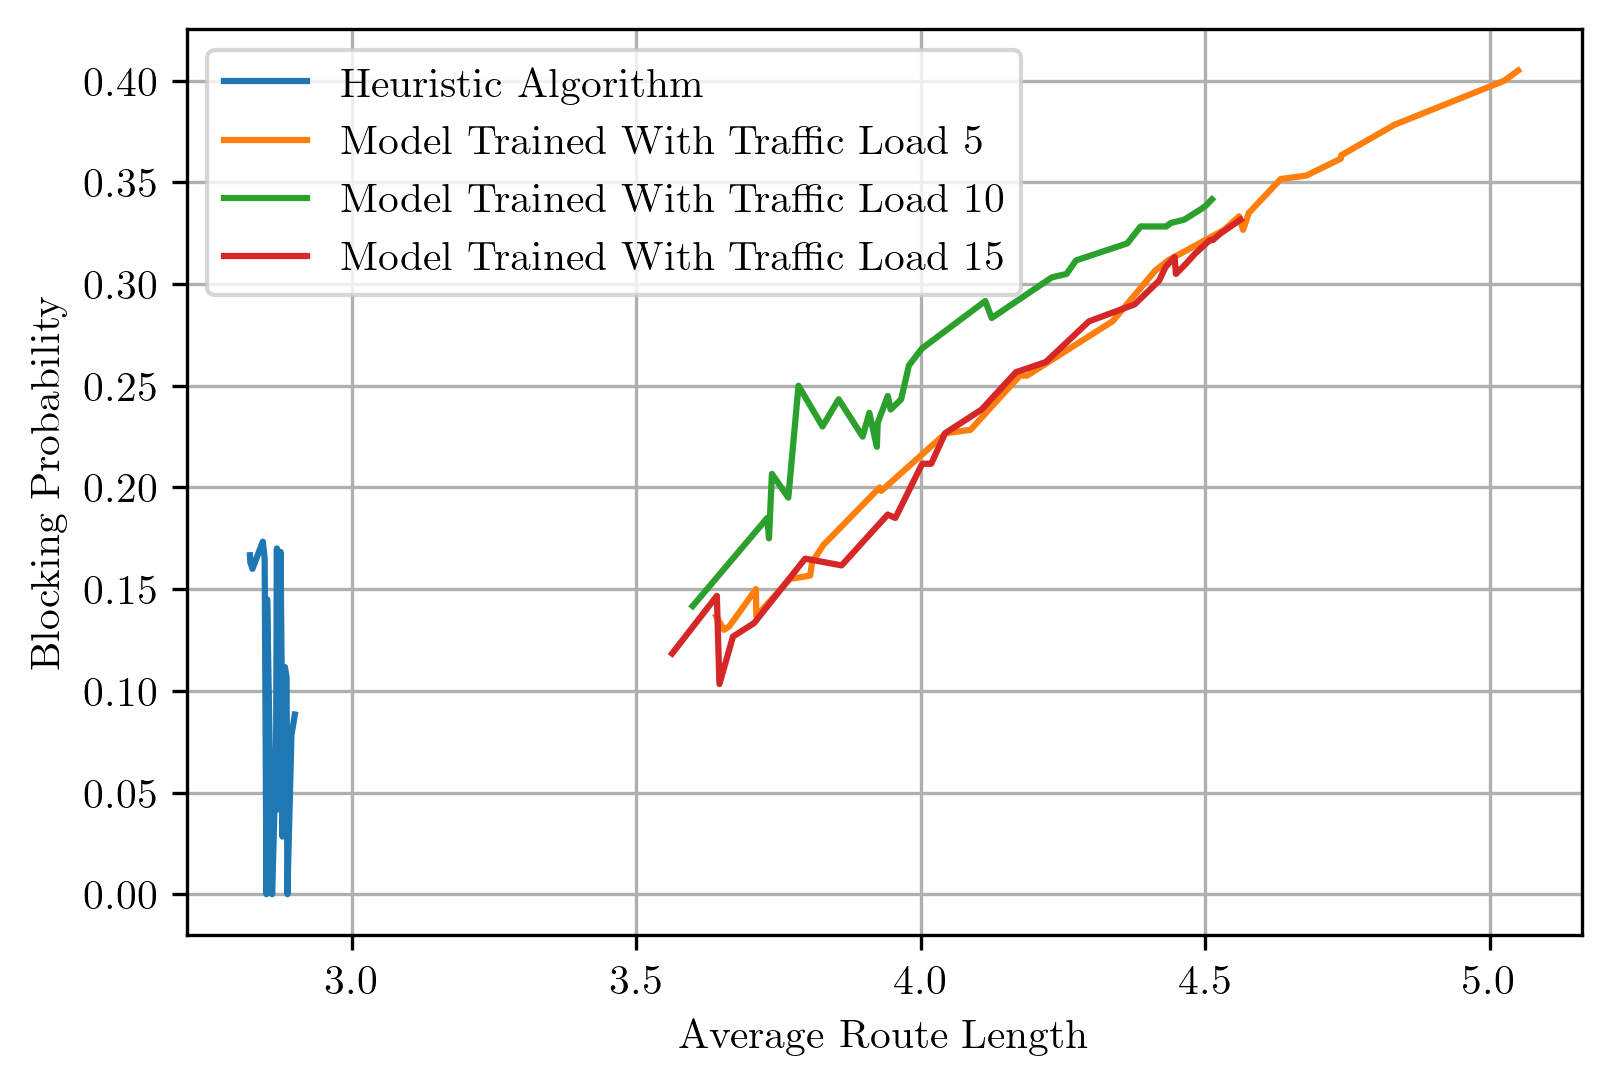

In [46]:
# route length vs blocking probability

fig, ax = plt.subplots(dpi=300)

agents = ['heuristic', 'TF_5', 'TF_10', 'TF_15']
for i in range(len(agents)):
    df_plot = df_meaned[[(agents[i], 'avg_length'), (agents[i], 'bp')]].sort_values(by=(agents[i], 'avg_length'))
    df_plot.plot(
        x=(agents[i], 'avg_length'),
        y=(agents[i], 'bp'),
        ax = ax,
        grid=True,
    )

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Average Route Length')
plt.show()
# plt.savefig('./figures/length_vs_bp.pgf', format='pgf')


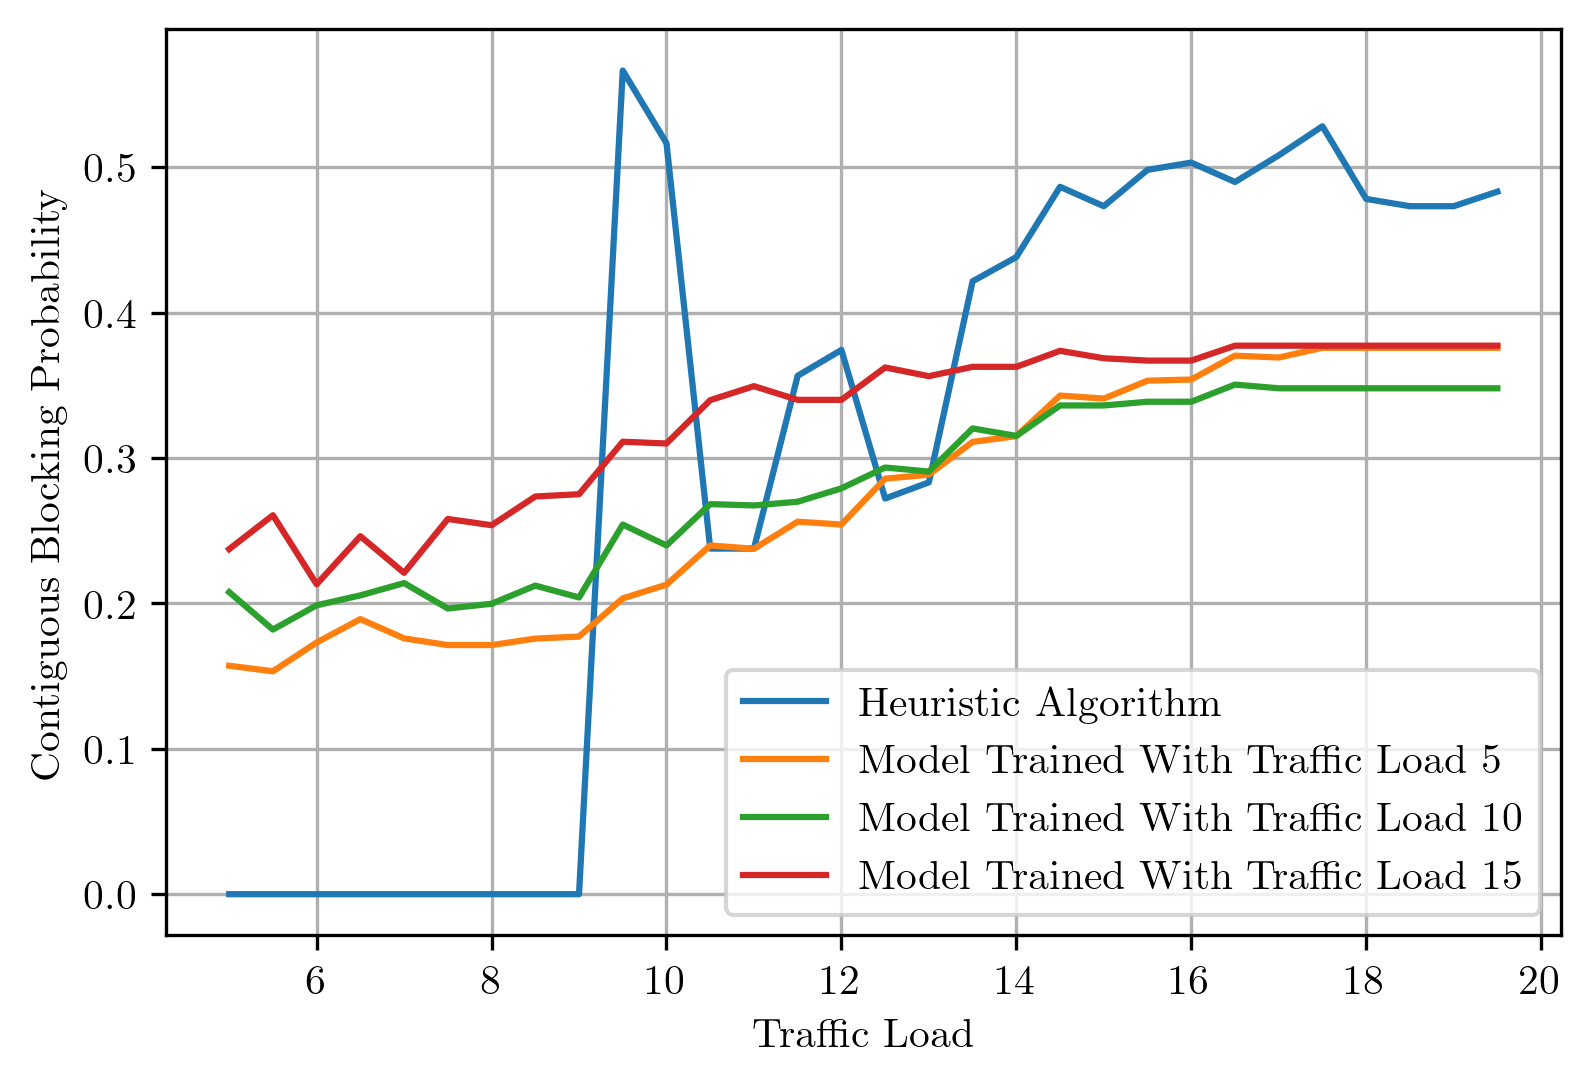

In [47]:
# contiguous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('heuristic', 'blocked_contiguous'), ('TF_5', 'blocked_contiguous'), ('TF_10', 'blocked_contiguous'), ('TF_15', 'blocked_contiguous')],
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Contiguous Blocking Probability')

plt.show()
# plt.savefig('./figures/bp_contiguous vs traffic load.pgf', format='pgf')

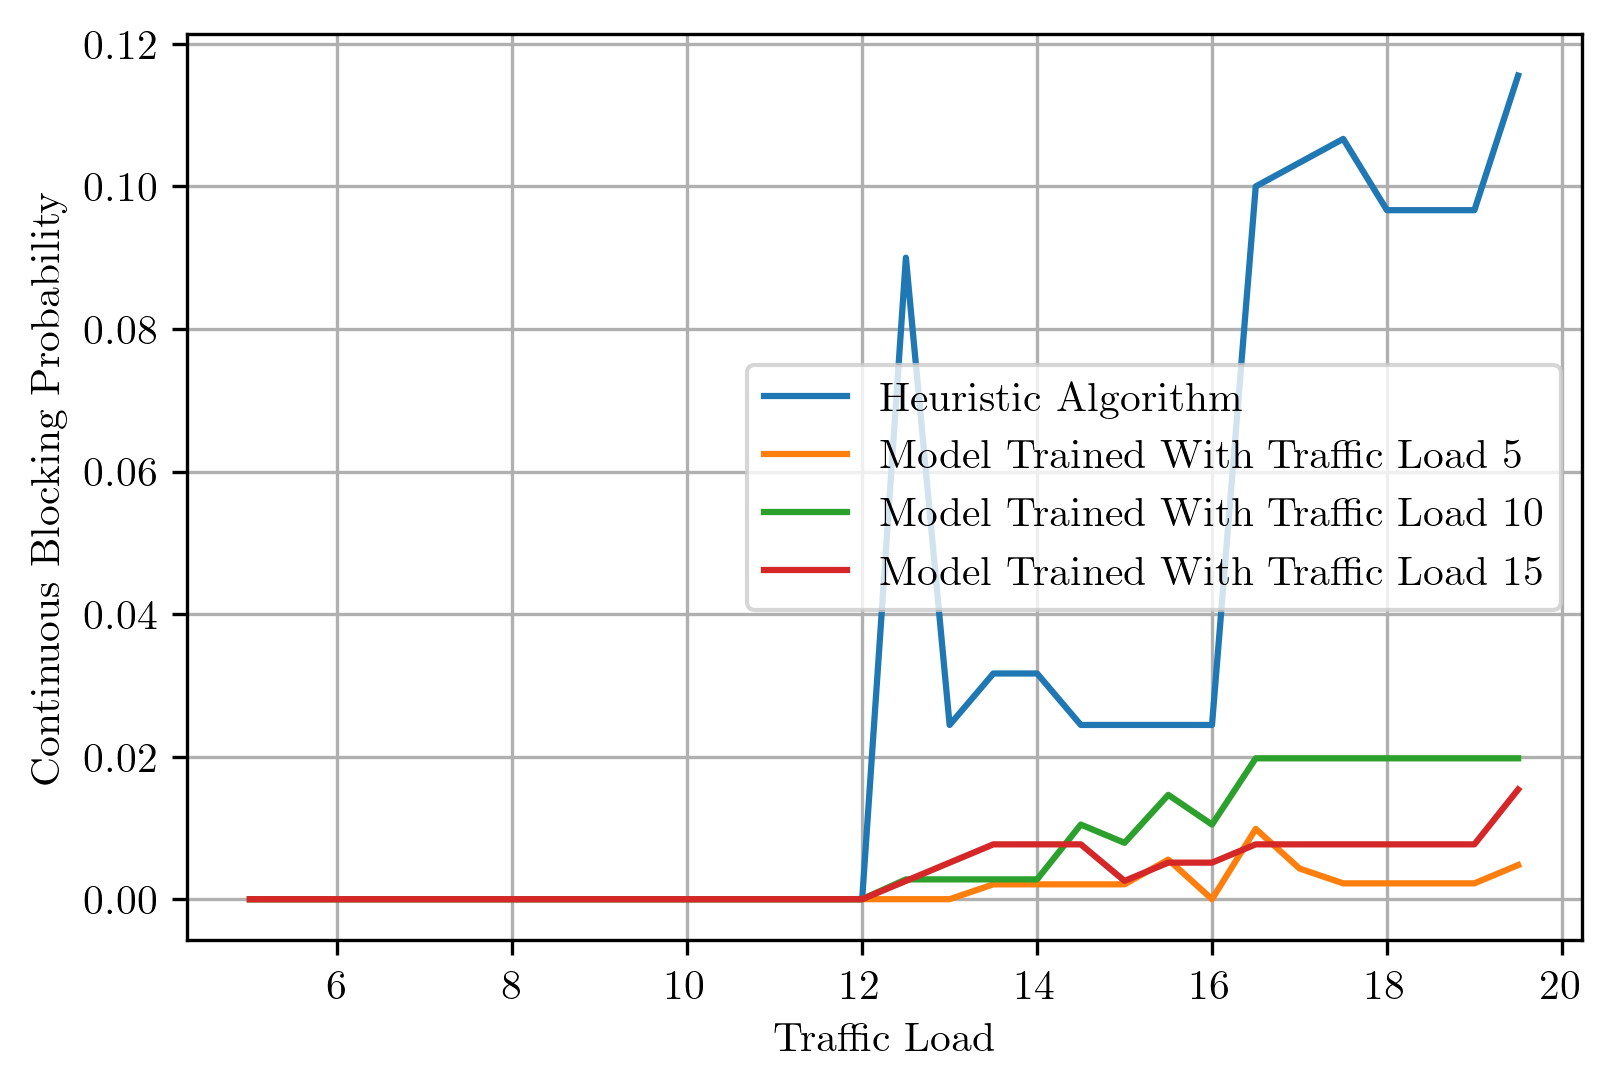

In [48]:
# continuous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('heuristic', 'blocked_continuous'), ('TF_5', 'blocked_continuous'), ('TF_10', 'blocked_continuous'), ('TF_15', 'blocked_continuous')],
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Continuous Blocking Probability')

plt.show()
# plt.savefig('./figures/bp_continuous vs traffic load.pgf', format='pgf')